In [193]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from scipy.stats import spearmanr

In [194]:
train = pd.read_csv("../data/train.csv")

In [195]:
train

,Unnamed: 0,N°DPE,Configuration_installation_chauffage_n°2,Facteur_couverture_solaire_saisi,Surface_habitable_desservie_par_installation_ECS,Emission_GES_éclairage,Cage_d'escalier,Conso_5_usages_é_finale_énergie_n°2,Type_générateur_froid,Type_émetteur_installation_chauffage_n°2,...,Qualité_isolation_enveloppe,Qualité_isolation_menuiseries,Qualité_isolation_murs,Qualité_isolation_plancher_bas,Qualité_isolation_plancher_haut_comble_aménagé,Qualité_isolation_plancher_haut_comble_perdu,Qualité_isolation_plancher_haut_toit_terrase,Surface_habitable_immeuble,Surface_habitable_logement,Type_bâtiment
0,0,2125E0981916Z,NaN,NaN,110.4,28.3,NaN,10676.1,NaN,NaN,...,insuffisante,bonne,insuffisante,très bonne,NaN,insuffisante,NaN,220.8,220.8,appartement
1,1,2244E1531282F,Installation de chauffage simple,NaN,83.5,10.6,NaN,8678.1,PAC air/air installée à partir de 2015,"Convecteur électrique NFC, NF** et NF***",...,insuffisante,moyenne,insuffisante,insuffisante,NaN,insuffisante,NaN,NaN,83.5,maison
2,2,2335E0208920V,NaN,NaN,68.0,8.9,NaN,NaN,NaN,NaN,...,insuffisante,insuffisante,insuffisante,bonne,NaN,très bonne,NaN,NaN,68.0,maison
3,3,2144E0974339H,NaN,NaN,NaN,1.8,NaN,2576.8,NaN,NaN,...,insuffisante,moyenne,insuffisante,insuffisante,NaN,NaN,NaN,3292.3,47.5,appartement
4,4,2228E2613102B,NaN,NaN,142.5,18.6,NaN,852.8,PAC air/air installée entre 2008 et 2014,NaN,...,insuffisante,insuffisante,insuffisante,moyenne,NaN,insuffisante,NaN,NaN,142.5,maison
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499995,2499995,2206E0696284L,NaN,NaN,82.7,10.8,NaN,NaN,NaN,NaN,...,insuffisante,insuffisante,insuffisante,insuffisante,NaN,insuffisante,NaN,NaN,82.7,maison
2499996,2499996,2206E0616319W,NaN,NaN,94.7,12.4,NaN,NaN,NaN,NaN,...,bonne,très bonne,bonne,insuffisante,NaN,moyenne,NaN,NaN,94.7,maison
2499997,2499997,2280E1335565A,NaN,NaN,27.5,0.1,NaN,NaN,NaN,NaN,...,très bonne,moyenne,bonne,très bonne,NaN,NaN,NaN,NaN,27.5,appartement
2499998,2499998,2256E1776887A,NaN,NaN,28.8,3.8,NaN,NaN,NaN,NaN,...,bonne,bonne,insuffisante,insuffisante,NaN,très bonne,NaN,NaN,28.8,appartement


In [196]:
train.drop(["Unnamed: 0",
    "N°DPE",
    "Nom__commune_(Brut)",
    "N°_département_(BAN)",
    "Code_INSEE_(BAN)",
    "Code_postal_(brut)",
    "Code_postal_(BAN)",
    "Description_générateur_chauffage_n°2_installation_n°2",
    "Cage_d'escalier",
    "Configuration_installation_chauffage_n°2",
    "Type_générateur_froid",
    "Type_émetteur_installation_chauffage_n°2",
    "Type_énergie_n°3",
    "Type_générateur_n°1_installation_n°2",
    "Qualité_isolation_plancher_haut_toit_terrase",
    "Facteur_couverture_solaire_saisi",
    "Surface_totale_capteurs_photovoltaïque",
    "Facteur_couverture_solaire",
    "Cage_d'escalier",
    "Surface_habitable_immeuble",
    "Qualité_isolation_plancher_haut_comble_aménagé"], axis = 1, inplace = True)

In [197]:
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()
le5 = LabelEncoder()
le6 = LabelEncoder()
le7 = LabelEncoder()
le8 = LabelEncoder()
le9 = LabelEncoder()


In [198]:
train.Type_bâtiment = le1.fit_transform(train.Type_bâtiment)
train.Qualité_isolation_plancher_haut_comble_perdu = le2.fit_transform(train.Qualité_isolation_plancher_haut_comble_perdu)
train.Qualité_isolation_enveloppe = le3.fit_transform(train.Qualité_isolation_enveloppe)
train.Qualité_isolation_menuiseries = le4.fit_transform(train.Qualité_isolation_menuiseries)
train.Qualité_isolation_murs = le5.fit_transform(train.Qualité_isolation_murs)
train.Qualité_isolation_plancher_bas = le6.fit_transform(train.Qualité_isolation_plancher_bas)
train.Etiquette_GES = le7.fit_transform(train.Etiquette_GES)
train.Classe_altitude = le8.fit_transform(train.Classe_altitude)
train.Etiquette_DPE = le9.fit_transform(train.Etiquette_DPE)

In [199]:
train = train.fillna(train.mean(), inplace=True)

In [201]:
correlation_matrix = train.corr()

In [202]:
train

,Surface_habitable_desservie_par_installation_ECS,Emission_GES_éclairage,Conso_5_usages_é_finale_énergie_n°2,Conso_chauffage_dépensier_installation_chauffage_n°1,Coût_chauffage_énergie_n°2,Emission_GES_chauffage_énergie_n°2,Etiquette_GES,Année_construction,Classe_altitude,Conso_5_usages/m²_é_finale,Conso_5_usages_é_finale,Etiquette_DPE,Hauteur_sous-plafond,Qualité_isolation_enveloppe,Qualité_isolation_menuiseries,Qualité_isolation_murs,Qualité_isolation_plancher_bas,Qualité_isolation_plancher_haut_comble_perdu,Surface_habitable_logement,Type_bâtiment
0,110.400000,28.3,10676.100000,39870.000000,342.000000,0.000000,2,1945.000000,1,171.9,37940.5,3,2.9,1,0,1,3,1,220.8,0
1,83.500000,10.6,8678.100000,17902.300000,1229.200000,577.400000,2,1966.479662,1,221.0,18484.5,5,2.5,1,2,1,1,1,83.5,2
2,68.000000,8.9,3892.274257,7791.800000,215.357764,419.080797,1,1983.000000,1,130.5,8873.0,4,2.5,1,1,1,0,3,68.0,2
3,346.379341,1.8,2576.800000,56755.990983,0.000000,0.000000,2,1976.000000,3,162.6,7729.5,2,2.5,1,2,1,1,4,47.5,0
4,142.500000,18.6,852.800000,48799.700000,0.000000,0.000000,4,1945.000000,1,303.8,43275.4,4,2.8,1,1,1,2,1,142.5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499995,82.700000,10.8,3892.274257,25595.900000,215.357764,419.080797,2,1947.000000,1,273.0,22616.6,6,2.5,1,1,1,1,1,82.7,2
2499996,94.700000,12.4,3892.274257,7342.800000,215.357764,419.080797,1,1960.000000,1,94.0,8908.4,3,2.6,0,3,0,1,2,94.7,2
2499997,27.500000,0.1,3892.274257,1879.400000,215.357764,419.080797,1,1949.000000,1,113.0,3103.9,4,2.5,3,2,0,3,4,27.5,0
2499998,28.800000,3.8,3892.274257,1896.900000,215.357764,419.080797,1,1966.479662,1,106.0,3065.5,3,2.5,0,0,1,1,3,28.8,0


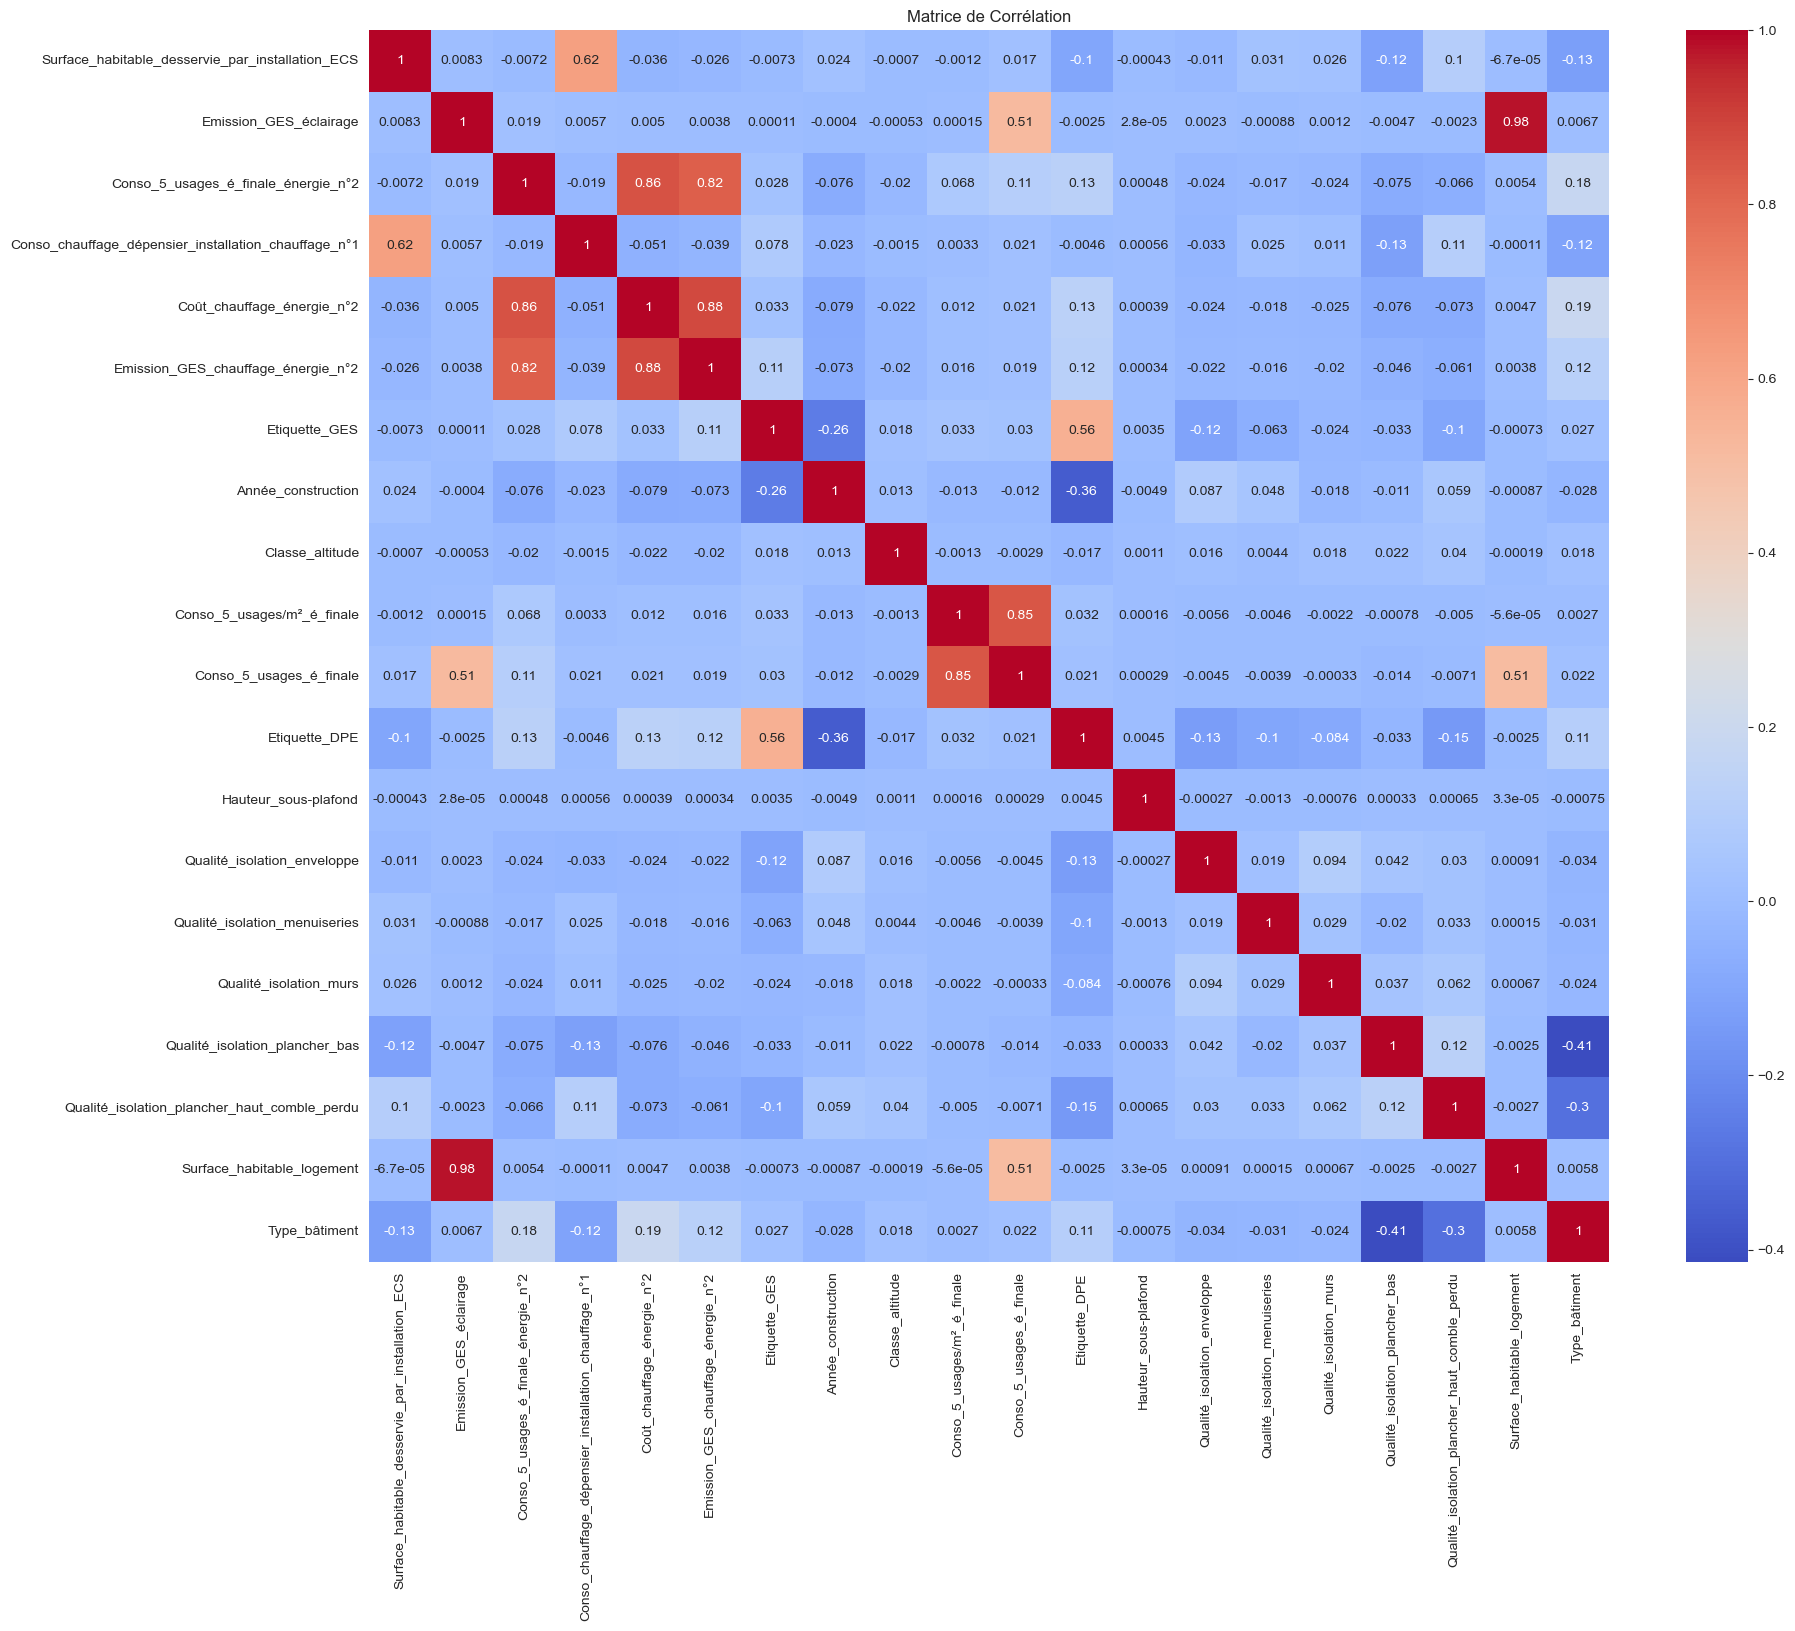

In [203]:
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matrice de Corrélation")
plt.show()

In [204]:
correlation_matrix, _ = spearmanr(train)

print(correlation_matrix)

[[ 1.00000000e+00  4.92611186e-01  1.54313550e-01  6.03332073e-01
   6.68704541e-02  3.63533216e-02 -5.62216121e-03  2.90259785e-02
   3.69502023e-02 -4.98404779e-02  3.07112167e-01 -1.32938183e-01
  -9.97716538e-03 -2.25514238e-02  2.58817517e-02  6.04194630e-04
  -2.27489674e-01 -1.85559940e-02  4.89004325e-01  2.45897043e-01]
 [ 4.92611186e-01  1.00000000e+00  2.16991465e-01  2.07837831e-01
   4.95760982e-02 -9.90320930e-03  3.18340323e-02  1.41893510e-02
  -4.62826431e-02  1.27504268e-02  5.94131568e-01 -1.01295586e-01
   6.18658688e-02 -4.14600004e-02 -1.18782535e-02 -2.24250708e-02
  -2.13061238e-01 -2.43689576e-01  8.40430514e-01  5.23167055e-01]
 [ 1.54313550e-01  2.16991465e-01  1.00000000e+00 -1.29895041e-01
   8.62232509e-01  8.39449328e-01 -3.85904294e-01 -5.29690529e-02
  -6.41298407e-04 -1.92755554e-01 -1.61555628e-02  1.36862094e-01
  -1.59254303e-02 -8.22925862e-03 -2.18275627e-02 -6.01277686e-02
  -5.28615646e-02 -1.11751125e-01  1.67759746e-01  2.68718209e-01]
 [ 6.03

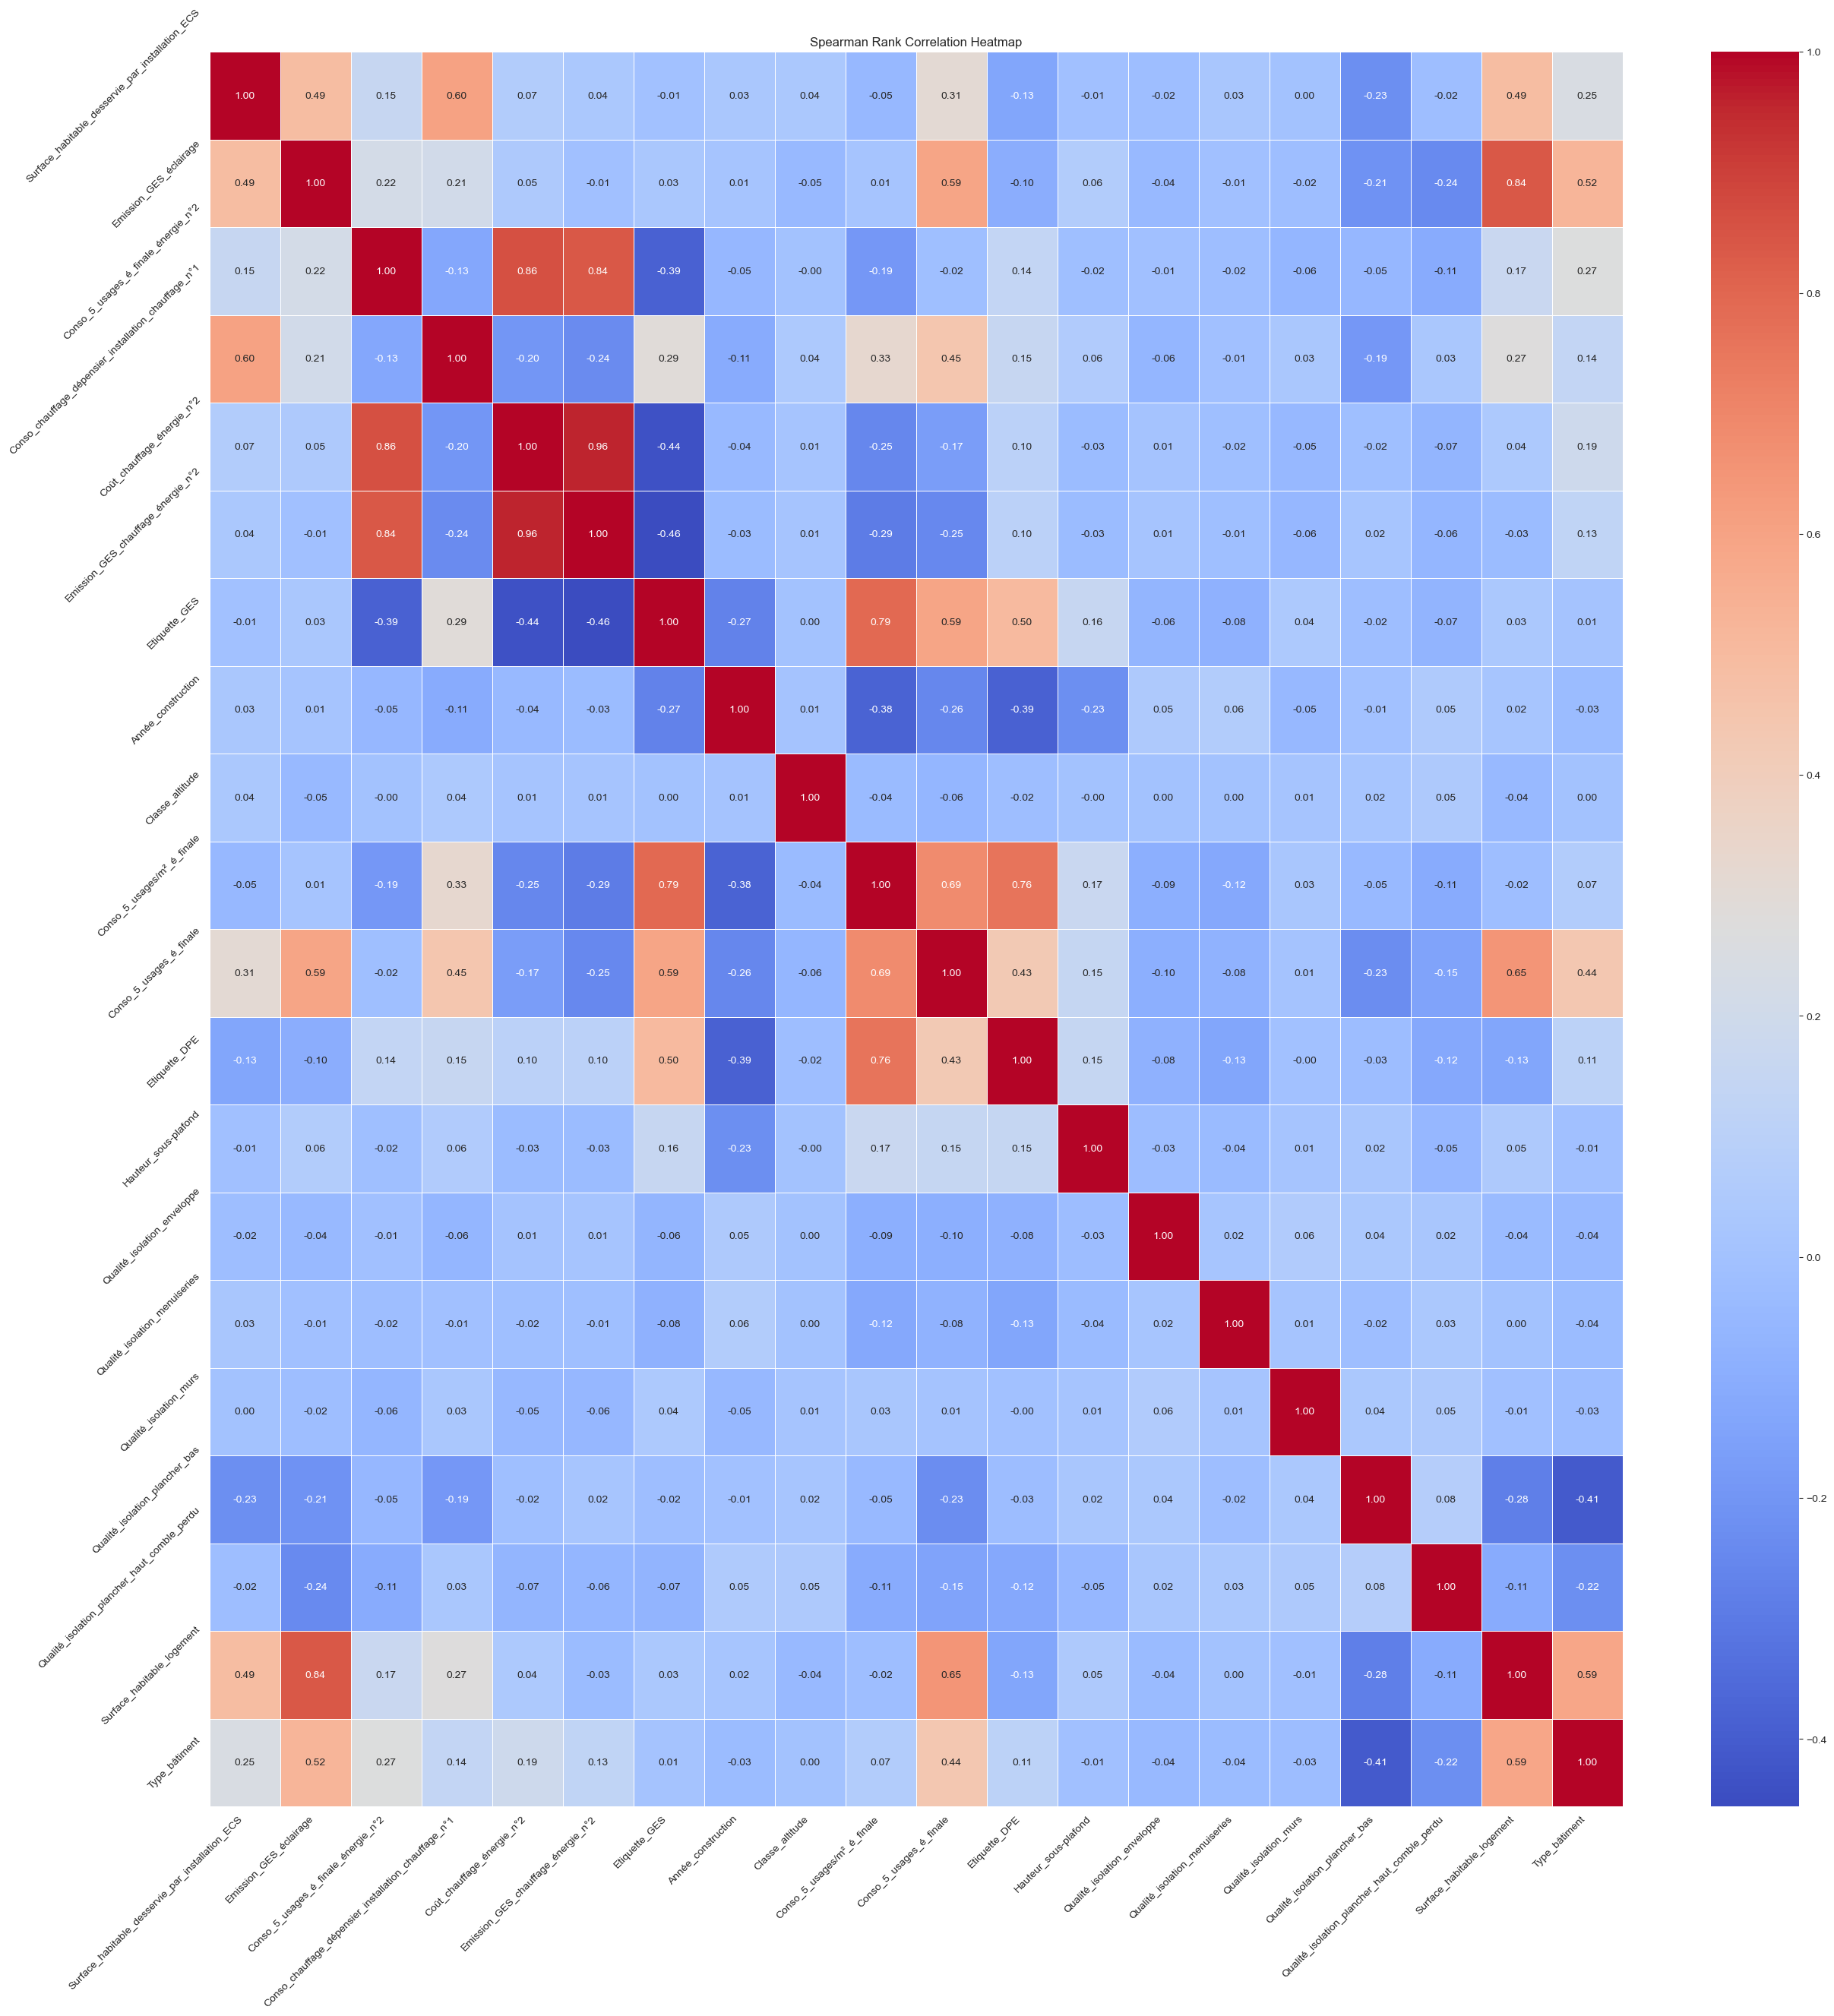

In [205]:
plt.figure(figsize=(30, 30))  # Set the size of the heatmap
ax = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Spearman Rank Correlation Heatmap")

# Add column names to the heatmap
ax.set_xticklabels(train.columns, rotation=45, horizontalalignment='right')
ax.set_yticklabels(train.columns, rotation=45, horizontalalignment='right')

plt.show()

In [206]:
train = train.astype(float)

In [207]:
target = train['Etiquette_DPE']

In [208]:
target = target.astype(int)

In [209]:
train.drop("Etiquette_DPE", axis = 1, inplace = True)

In [210]:
model = lgb.LGBMClassifier(n_estimators=500, learning_rate=0.1, num_leaves=16)

In [211]:
model.fit(train, target)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.043967 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 2500000, number of used features: 19
[LightGBM] [Info] Start training from score -5.300720
[LightGBM] [Info] Start training from score -3.737868
[LightGBM] [Info] Start training from score -1.446304
[LightGBM] [Info] Start training from score -1.127960
[LightGBM] [Info] Start training from score -1.476993
[LightGBM] [Info] Start training from score -2.222761
[LightGBM] [Info] Start training from score -2.584381


LGBMClassifier(n_estimators=500, num_leaves=16)

In [241]:
test = pd.read_csv("../data/test.csv")

In [242]:
test.drop(["Unnamed: 0",
    "N°DPE",
    "Nom__commune_(Brut)",
    "N°_département_(BAN)",
    "Code_INSEE_(BAN)",
    "Code_postal_(brut)",
    "Code_postal_(BAN)",
    "Description_générateur_chauffage_n°2_installation_n°2",
    "Cage_d'escalier",
    "Configuration_installation_chauffage_n°2",
    "Type_générateur_froid",
    "Type_émetteur_installation_chauffage_n°2",
    "Type_énergie_n°3",
    "Type_générateur_n°1_installation_n°2",
    "Qualité_isolation_plancher_haut_toit_terrase",
    "Facteur_couverture_solaire_saisi",
    "Surface_totale_capteurs_photovoltaïque",
    "Facteur_couverture_solaire",
    "Cage_d'escalier",
    "Surface_habitable_immeuble",
    "Qualité_isolation_plancher_haut_comble_aménagé"], axis = 1, inplace = True)

In [243]:
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()
le5 = LabelEncoder()
le6 = LabelEncoder()
le7 = LabelEncoder()
le8 = LabelEncoder()
le9 = LabelEncoder()

In [244]:
test.Type_bâtiment = le1.fit_transform(test.Type_bâtiment)
test.Qualité_isolation_plancher_haut_comble_perdu = le2.fit_transform(test.Qualité_isolation_plancher_haut_comble_perdu)
test.Qualité_isolation_enveloppe = le3.fit_transform(test.Qualité_isolation_enveloppe)
test.Qualité_isolation_menuiseries = le4.fit_transform(test.Qualité_isolation_menuiseries)
test.Qualité_isolation_murs = le5.fit_transform(test.Qualité_isolation_murs)
test.Qualité_isolation_plancher_bas = le6.fit_transform(test.Qualité_isolation_plancher_bas)
test.Etiquette_GES = le7.fit_transform(test.Etiquette_GES)
test.Classe_altitude = le8.fit_transform(test.Classe_altitude)
test.Etiquette_DPE = le9.fit_transform(test.Etiquette_DPE)

In [245]:
test = test.fillna(value=0)

test = test.astype(float)

In [246]:
test

,Surface_habitable_desservie_par_installation_ECS,Emission_GES_éclairage,Conso_5_usages_é_finale_énergie_n°2,Conso_chauffage_dépensier_installation_chauffage_n°1,Coût_chauffage_énergie_n°2,Emission_GES_chauffage_énergie_n°2,Etiquette_GES,Année_construction,Classe_altitude,Conso_5_usages/m²_é_finale,Conso_5_usages_é_finale,Etiquette_DPE,Hauteur_sous-plafond,Qualité_isolation_enveloppe,Qualité_isolation_menuiseries,Qualité_isolation_murs,Qualité_isolation_plancher_bas,Qualité_isolation_plancher_haut_comble_perdu,Surface_habitable_logement,Type_bâtiment
0,19.4,2.5,1773.070968,898.6,55.819798,36.502451,1.0,1947.000000,1.0,119.0,2321.8,4.0,2.5,0.0,2.0,0.0,3.0,4.0,19.4,0.0
1,42.6,5.3,1773.070968,4657.3,55.819798,36.502451,1.0,1968.923447,1.0,132.0,5620.9,4.0,2.5,1.0,3.0,1.0,3.0,1.0,42.6,0.0
2,100.0,13.6,1773.070968,8573.4,55.819798,36.502451,1.0,1994.000000,1.0,96.0,9658.5,3.0,2.5,0.0,2.0,2.0,2.0,3.0,100.0,2.0
3,80.0,10.9,1773.070968,4915.1,55.819798,36.502451,1.0,2007.000000,1.0,82.0,6601.1,3.0,2.5,3.0,2.0,0.0,0.0,1.0,80.0,2.0
4,70.5,9.2,1773.070968,628.5,55.819798,36.502451,0.0,2006.000000,1.0,42.0,2963.9,1.0,2.5,1.0,0.0,0.0,3.0,3.0,70.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,80.6,10.5,1773.070968,17145.4,55.819798,36.502451,2.0,1973.000000,1.0,196.0,15863.1,6.0,2.5,1.0,0.0,1.0,1.0,3.0,80.6,2.0
499996,37.0,4.8,1773.070968,3053.2,55.819798,36.502451,1.0,1948.000000,1.0,105.0,3895.5,3.0,2.5,1.0,2.0,1.0,3.0,3.0,37.0,0.0
499997,78.3,10.7,1773.070968,1582.9,55.819798,36.502451,0.0,2018.000000,1.0,32.0,2526.3,1.0,2.5,0.0,0.0,0.0,3.0,2.0,78.3,0.0
499998,51.4,6.6,1773.070968,10028.5,55.819798,36.502451,2.0,1968.923447,1.0,198.0,10216.2,6.0,3.4,1.0,1.0,1.0,1.0,3.0,51.4,0.0


In [247]:
test_target = test['Etiquette_DPE']
test.drop("Etiquette_DPE", axis = 1, inplace = True)

In [248]:
test_target = test_target.astype(int)

In [249]:
ypred=model.predict(test)

In [250]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(ypred, test_target)

In [251]:
accuracy

0.668216

In [252]:
val = pd.read_csv("../data/val.csv")

In [253]:
ids = val['N°DPE']


In [254]:
val

,N°DPE,Configuration_installation_chauffage_n°2,Facteur_couverture_solaire_saisi,Surface_habitable_desservie_par_installation_ECS,Emission_GES_éclairage,Cage_d'escalier,Conso_5_usages_é_finale_énergie_n°2,Type_générateur_froid,Type_émetteur_installation_chauffage_n°2,Surface_totale_capteurs_photovoltaïque,...,Qualité_isolation_enveloppe,Qualité_isolation_menuiseries,Qualité_isolation_murs,Qualité_isolation_plancher_bas,Qualité_isolation_plancher_haut_comble_aménagé,Qualité_isolation_plancher_haut_comble_perdu,Qualité_isolation_plancher_haut_toit_terrase,Surface_habitable_immeuble,Surface_habitable_logement,Type_bâtiment
0,2289E0123978W,NaN,NaN,35.0,4.4,NaN,NaN,NaN,NaN,NaN,...,insuffisante,insuffisante,insuffisante,insuffisante,NaN,insuffisante,NaN,NaN,35.0,maison
1,2274E1764260B,NaN,NaN,85.4,11.0,NaN,NaN,NaN,NaN,NaN,...,très bonne,moyenne,bonne,très bonne,NaN,très bonne,NaN,NaN,85.4,appartement
2,2206E2755246H,NaN,NaN,114.0,29.8,NaN,NaN,PAC air/air installée entre 2008 et 2014,NaN,NaN,...,bonne,insuffisante,bonne,bonne,NaN,moyenne,NaN,NaN,227.9,maison
3,2211E2030092Y,NaN,NaN,39.0,5.1,NaN,NaN,NaN,NaN,NaN,...,insuffisante,moyenne,insuffisante,très bonne,NaN,très bonne,NaN,NaN,39.0,appartement
4,2290E0952951M,NaN,NaN,120.4,15.1,NaN,NaN,NaN,NaN,NaN,...,très bonne,très bonne,très bonne,bonne,très bonne,NaN,NaN,NaN,120.4,maison
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300364,2291E1190906Q,NaN,NaN,30.3,1.2,NaN,26.3,NaN,NaN,NaN,...,insuffisante,très bonne,moyenne,très bonne,NaN,NaN,NaN,8498.0,30.3,appartement
300365,2294E0746615Q,NaN,NaN,69.0,2.6,NaN,70.5,NaN,NaN,NaN,...,insuffisante,très bonne,très bonne,très bonne,NaN,NaN,NaN,1598.0,69.0,appartement
300366,2277E2104127Z,NaN,NaN,46.7,1.8,NaN,914.1,NaN,NaN,NaN,...,très bonne,très bonne,très bonne,très bonne,NaN,NaN,NaN,1975.3,46.7,appartement
300367,2152E1037858Q,NaN,NaN,6.3,2.7,NaN,86.6,NaN,NaN,NaN,...,insuffisante,moyenne,très bonne,très bonne,NaN,NaN,NaN,816.0,75.0,appartement


In [255]:
val.drop([
    "N°DPE",
    "Nom__commune_(Brut)",
    "N°_département_(BAN)",
    "Code_INSEE_(BAN)",
    "Code_postal_(brut)",
    "Code_postal_(BAN)",
    "Description_générateur_chauffage_n°2_installation_n°2",
    "Cage_d'escalier",
    "Configuration_installation_chauffage_n°2",
    "Type_générateur_froid",
    "Type_émetteur_installation_chauffage_n°2",
    "Type_énergie_n°3",
    "Type_générateur_n°1_installation_n°2",
    "Qualité_isolation_plancher_haut_toit_terrase",
    "Facteur_couverture_solaire_saisi",
    "Surface_totale_capteurs_photovoltaïque",
    "Facteur_couverture_solaire",
    "Cage_d'escalier",
    "Surface_habitable_immeuble",
    "Qualité_isolation_plancher_haut_comble_aménagé"], axis = 1, inplace = True)

In [256]:
val.Type_bâtiment = le1.fit_transform(val.Type_bâtiment)
val.Qualité_isolation_plancher_haut_comble_perdu = le2.fit_transform(val.Qualité_isolation_plancher_haut_comble_perdu)
val.Qualité_isolation_enveloppe = le3.fit_transform(val.Qualité_isolation_enveloppe)
val.Qualité_isolation_menuiseries = le4.fit_transform(val.Qualité_isolation_menuiseries)
val.Qualité_isolation_murs = le5.fit_transform(val.Qualité_isolation_murs)
val.Qualité_isolation_plancher_bas = le6.fit_transform(val.Qualité_isolation_plancher_bas)
val.Etiquette_GES = le7.fit_transform(val.Etiquette_GES)
val.Classe_altitude = le8.fit_transform(val.Classe_altitude)

In [258]:
val = val.fillna(value=0)

val = val.astype(float)

In [259]:
val_pred = model.predict(val)

In [260]:
val_pred = le9.inverse_transform(val_pred)

In [261]:
val_pred

array(['G', 'B', 'B', ..., 'B', 'D', 'C'], dtype=object)

In [262]:
submission = pd.DataFrame()
submission['N°DPE'] = ids.to_list()
submission['Etiquette_DPE'] = val_pred
# submission.to_csv("subs/sub1.csv", index=False)
# print(f"Submission registered at sub1.csv")

In [263]:
submission

,N°DPE,Etiquette_DPE
0,2289E0123978W,G
1,2274E1764260B,B
2,2206E2755246H,B
3,2211E2030092Y,C
4,2290E0952951M,A
...,...,...
300364,2291E1190906Q,C
300365,2294E0746615Q,C
300366,2277E2104127Z,B
300367,2152E1037858Q,D


In [264]:
submission.to_csv("../subs/sub1.csv", index=False)
print(f"Submission registered at sub2.csv")

Submission registered at sub2.csv
